# Drawing Functions in OpenCV

## Goal

- Learn to draw different geometric shapes with OpenCV
- You will learn these functions: `cv2.line()`, `cv2.circle()`, `cv2.rectangle()`, `cv2.ellipse()`, `cv2.putText()`, etc.

## Code

In all the above functions, you will see some common arguments as given below:

- img: The image where you want to draw the shapes
- color: Color of the shape, for BGR, pass it as a tuple, eg: `(255, 0, 0)` for blue. For grayscale, just pass the scalar value.
- thickness: Thickness of the line or circle, etc. If `-1` is passed for closed figures like circles, it will fill the shape. `default thickness = 1`
- lineType: Type of line, whether 8-connected, anti-aliased line etc. *By default, it is 8-connected*. `cv2.LINE_AA` gives anti-aliased line which looks great for curves.

### Drawing Line

To draw a line, you need to pass starting and ending coordinates of the line. We will create a black image and draw a blue line on it from top-left to bottom-right corners.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

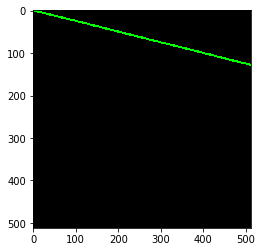

In [2]:
# Create a black image
img = np.zeros((512, 512, 3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
cv2.line(img, (0, 0), (510, 128), (0, 255, 0), 3)
plt.imshow(img)

### Drawing Rectangle

To draw a rectangle, you need top-left corner and bottom-right corner of rectangle. This time we will draw a green rectangle at top-right corner of image.

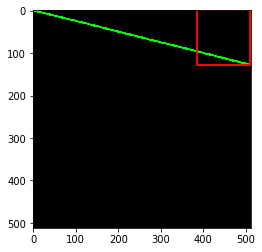

In [3]:
cv2.rectangle(img, (384, 0), (510, 128), (255, 0, 0), 3)
plt.imshow(img)

### Drawing Ellipse

To draw the ellipse, we need to pass several arguments. One argument is the center location (x, y). Next argument is axes lengths (major axis length, minor axis length). `angle` is the angle of rotation of ellipse in anti-clockwise direction. `startAngle` and `endAngle` denotes the starting and ending of ellipse arc measured in clockwise direction from major axis. For example: giving values 0 and 360 gives the full ellipse. For more details, check the documentation of `cv2.ellipse()`. Below example draws a half ellipse at the center of the image.

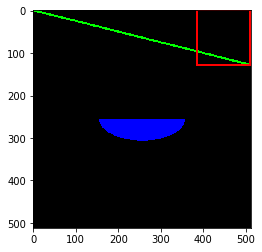

In [4]:
cv2.ellipse(img=img, center=(256, 256), axes=(100, 50), angle=0, startAngle=0, endAngle=180, color=(0, 0, 255), thickness=-1)
plt.imshow(img)

### Drawing Polygon

To draw a polygon, first you need coordinates of vertices. Make those points into an array of shape `ROWSx1x2` where `ROWS` are number of vertices and it should be of type `int32`. Here we draw a small polygon of four vertices in yellow color.

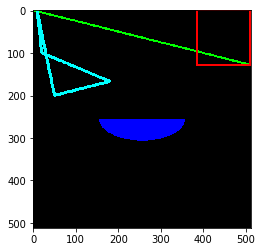

In [5]:
pts = np.array([[10, 5], [20, 100], [180, 167], [50, 200]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (0, 255, 255), thickness=5)
plt.imshow(img)

**Note**

If third argument is `False`, you will get a polylines joining all the points, not a closed shape.

`cv2.polylines()` can be used to draw multiple lines. Just create a list of all the lines you want to draw and pass it to the function. All lines will be drawn individually. It is a much better and faster way to draw a group of lines than calling cv2.lines() for each line.

### Adding Text to Images

To put texts in images, you need specify following things.

- Text data that you want to write
- Position coordinates of where you want to put it (i.e. bottom-left corner where data starts).
- Font Scale (specifies the size of font)
- regular things like color, thickness, lineType, etc. For better look, `lineType=cv2.LINE_AA` is recommended.

We will write *OpenCV* on our image in white color.

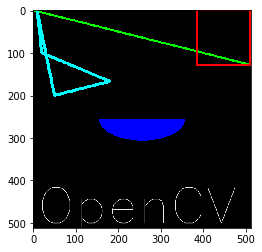

In [6]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img=img, text='OpenCV', org=(10, 500), fontFace=font, fontScale=4, color=(255, 255, 255), lineType=cv2.LINE_AA)
plt.imshow(img)